#### Import Libraries for Plot & Modelling

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

##### Read Data File & check for size & data type

In [179]:
df = pd.read_csv('House Price India.csv')

In [180]:
df.shape

(14619, 23)

In [181]:
df.dtypes

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

In [182]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


#### Data Preparing for Modelling
Independent variable - Number of bedrooms, living area, Old (2024 - built year)
Dependent variable - Price

Note1: Presence of other variables in data makes it difficult to predict price with only 4 independent variable. 
So to reduce the varaiations, some variables are constrinted to a range. The following variables range is fixed 

* lot area - range is huge (constrained fr <= 10,000 sq ft) - found by iteration
* waterfront present - 0,1 - only not present (0) is considered
* Renovation year - 0,1 - only not renovated (0) is considered

Note 2:
Among indepnedent variables uner consideration number of bedroom and Old is constrained for better result and reduce the effect of outlier

* Number of bedrooms - 2 to 5 bedrooms (range is 1 to 33)
* Old - house of age withput renovation <= 80 is only considered
* number of bathrooms - restricted to  3 bathrooms
                   

Note3:
* ID is unique hence assumed each corresponds to a unique house entry
* living_area_renov & lot_area_renov are not considered as column description not given clearly

Note4: Unconstrained Variables
* number of schools nearby - 1,2,3
* postal code - ranges between 122004 and 122066 which mostly will corresponds to only one city (Gurugaon in real time)
* Distance from the airport - not cosidered as major influencing variable
* Lattitude, Longitude - connected with postal code hence effect not considered
* number of views  
* condition of the house                    
* grade of the house                         
* Area of the house(excluding basement)      
* Area of the basement 



In [183]:
df['id'].value_counts(ascending = False)

6762810635    1
6762812541    1
6762813736    1
6762813785    1
6762814009    1
             ..
6762812410    1
6762812471    1
6762812563    1
6762812717    1
6762831463    1
Name: id, Length: 14619, dtype: int64

In [184]:
df['number of bathrooms'].value_counts()

2.50    3677
1.00    2509
1.75    2062
2.25    1378
2.00    1323
1.50     968
2.75     831
3.00     510
3.50     504
3.25     424
3.75     101
4.00      81
4.50      72
4.25      56
0.75      47
4.75      17
5.00      15
5.25      12
5.50       8
1.25       7
0.50       3
6.00       3
8.00       2
5.75       2
6.25       2
6.75       2
6.50       1
7.50       1
7.75       1
Name: number of bathrooms, dtype: int64

In [185]:
df['Number of schools nearby'].value_counts()

3    4973
2    4852
1    4794
Name: Number of schools nearby, dtype: int64

In [186]:
df['Postal Code'].unique()

array([122004, 122005, 122006, 122007, 122008, 122009, 122010, 122011,
       122012, 122013, 122014, 122015, 122016, 122017, 122018, 122019,
       122020, 122021, 122022, 122023, 122024, 122025, 122026, 122027,
       122028, 122029, 122030, 122031, 122032, 122033, 122034, 122035,
       122036, 122037, 122038, 122039, 122040, 122041, 122042, 122043,
       122044, 122045, 122046, 122047, 122048, 122049, 122003, 122050,
       122051, 122052, 122053, 122054, 122055, 122056, 122057, 122058,
       122059, 122060, 122061, 122062, 122063, 122064, 122065, 122066,
       122067, 122068, 122069, 122070, 122071, 122072], dtype=int64)

In [187]:
df['number of bedrooms'].value_counts(ascending = False)

3     6612
4     4724
2     1844
5     1078
6      176
1      136
7       30
8       11
9        3
10       3
33       1
11       1
Name: number of bedrooms, dtype: int64

In [188]:
df['waterfront present'].value_counts()

0    14507
1      112
Name: waterfront present, dtype: int64

In [189]:
df0 = df[(df['lot area'] <= 10000)]

In [190]:
df0.shape

(10416, 23)

In [191]:
df0.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
7,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,...,1955,0,122009,52.8014,-114.598,2010,6550,1,73,750000


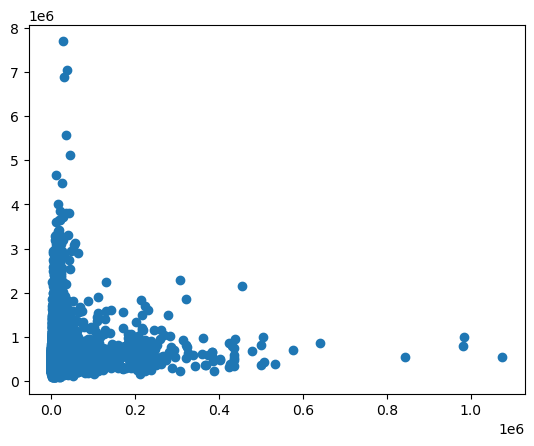

In [192]:
plt.scatter(df['lot area'], df.Price)

In [193]:
df0[df0['Renovation Year']==0].shape

(9965, 23)

In [195]:
df1 = df[(df['Renovation Year'] == 0) & (df['waterfront present'] == 0) & (df['number of floors'] <=5) & (df['lot area'] <=10000) & (df['number of bathrooms'] <3)][['number of bedrooms','living area', 'Built Year', 'Price']]

In [196]:
df1.shape

(8953, 4)

In [197]:
df1['Old'] = 2024 - df1[['Built Year']]

In [198]:
df1.head()

,number of bedrooms,living area,Built Year,Price,Old
0,4,2920,1909,1400000,115
1,5,2910,1939,1200000,85
3,3,2710,1929,805000,95
4,3,2600,1951,790000,73
7,3,2390,1955,750000,69


In [199]:
df1.shape

(8953, 5)

In [200]:
df2 = df1[(df1['Old'] <= 80) & (df1['number of bedrooms'] <= 8)][['number of bedrooms', 'living area', 'Old', 'Price']]

In [201]:
df2.shape

(7048, 4)

In [202]:
df2.head()

,number of bedrooms,living area,Old,Price
4,3,2600,73,790000
7,3,2390,69,750000
10,4,1820,79,650000
11,4,1520,79,640000
13,3,1750,19,626000


##### Checking for null values in the colums 

In [203]:
df2['number of bedrooms'].isna().sum()

0

#### Plots to check for the dependence of Independent variables on Price

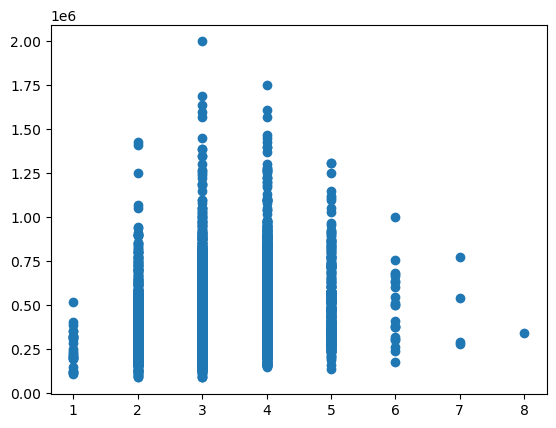

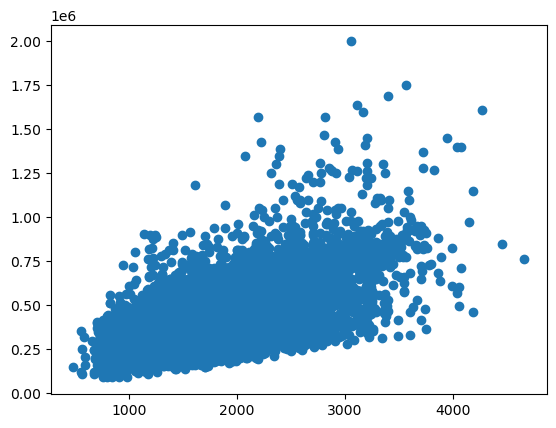

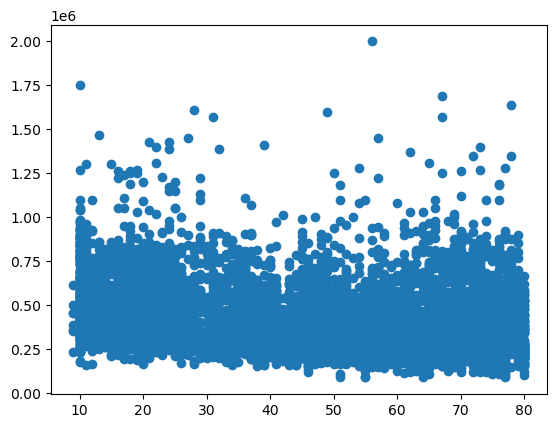

In [204]:
plt.scatter(df2['number of bedrooms'], df2['Price'])
plt.show()
plt.scatter(df2['living area'], df2['Price'])
plt.show()
plt.scatter(df2['Old'], df2['Price'])
plt.show()

#### Train Test Split 

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X = df2[['number of bedrooms', 'living area', 'Old']]
y = df2.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)


#### Linear Reg with Multiple Variables 

In [207]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [208]:
model.coef_

array([-52980.14802655,    221.41798276,    720.28103221])

In [209]:
model.intercept_

161210.9234578372

In [210]:
y_pred = model.predict(X_test)

In [211]:
df3= X_test[['number of bedrooms', 'living area', 'Old']] 

In [212]:
df3['y_test'] = y_test

In [213]:
df3['y_pred']=y_pred

In [214]:
df3

,number of bedrooms,living area,Old,y_test,y_pred
1084,3,1480,59,320000,372465.674761
10797,4,2260,10,359950,456897.782708
10966,4,2360,69,385000,521536.161884
14199,3,1660,21,279000,384950.232434
8749,3,1960,21,425000,451375.627261
...,...,...,...,...,...
1662,2,1260,73,436500,386817.801032
8688,3,1050,56,199000,275095.099078
14500,3,1260,75,445000,335278.215070
4746,3,1420,62,235000,361341.438892
